In [ ]:
# import os
# os.kill(os.getpid(), 9)

# 데이터 전처리 과정


In [1]:
# 데이터 불러오기

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive 
drive.mount('/content/gdrive')
# pd.set_option('display.max_columns', 10 )
# pd.set_option('display.max_rows', 100)

pd.set_option('display.float_format', None)

Mounted at /content/gdrive


In [5]:
df=pd.read_csv('/content/gdrive/MyDrive/Colab reference/vgames2.csv')
df.shape


(16598, 10)

In [6]:
df.isnull().sum() # data의 결측치 를 확인하고

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [7]:
df.dropna(axis=0,inplace=True) # Year column의 NaN값이 포함된 열 전체 제거 -> 전체 data의 양 중 1%
df.isnull().sum() # 결측치 제거 후 수치 확인함

Unnamed: 0     0
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [8]:
df.shape

(16241, 10)

In [9]:
df['Year'].astype(int) 

0        2008
1        2009
2        2010
3        2010
4        2010
         ... 
16593    2006
16594    2005
16595    2015
16596    2013
16597    1996
Name: Year, Length: 16241, dtype: int64

In [10]:
# 불러온 data의 year column에 data 가공을 위해 
# 0 ~ 20 은 + 2000
# 79 ~ 100 은 + 1900
# 을 해서 data 가공을 진행함

def change_year(x) :
    if 79<x<100 in df['Year'] :
       return x+1900
    elif 0<= x <20 in df['Year'] : 
       return x+2000
    else :
       return x

df['Year']=df['Year'].apply(change_year)
# df1 = df.sort_values(by=['Year'], axis=0, ascending = True)
# df2.sort_values(by=['NA_Sales'], axis=0, ascending = False)
df['Year'].describe()
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [11]:
# data 정리 후 index를 reset하고 unnamed column을 제거하고
# df1로 저장함

df.reset_index()
df1=df.drop(['Unnamed: 0'],axis=1)
df1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [12]:
# df1의 결측치를 확인한뒤

df1.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [13]:
# 지역별 판매량 수치 정리를 위해 'K'에는 0.001을 곱해주고, 'M'에는 1을 곱해줍니다.

df1.NA_Sales = (df1.NA_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * \
                df1.NA_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False)
                .fillna(1)
                .replace(['K','M'], [0.001, 1]).astype(int))
df1.EU_Sales = (df1.EU_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * \
                df1.EU_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False)
                .fillna(1)
                .replace(['K','M'], [0.001, 1]).astype(int))
df1.JP_Sales = (df1.JP_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * \
                df1.JP_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False)
                .fillna(1)
                .replace(['K','M'], [0.001, 1]).astype(int))
df1.Other_Sales = (df1.Other_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * \
                   df1.Other_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False)
                   .fillna(1)
                   .replace(['K','M'], [0.001, 1]).astype(int))

# 변경된 데이터에 일괄 10**6을 해서 자료정리를 완료합니다.

df1['NA_Sales']=df1['NA_Sales']*(10**6)
df1['EU_Sales']=df1['EU_Sales']*(10**6)
df1['JP_Sales']=df1['JP_Sales']*(10**6)
df1['Other_Sales']=df1['Other_Sales']*(10**6)

# df2의 platform 의 2600을 A2600 (Altari)으로 변경합니다.(헷갈림 방지)

df1['Platform'].replace({'2600' : 'A2600'},inplace = True)


In [14]:
df1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000.0,0.0,0.0,0.0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0


In [15]:
# 판매량 데이터 object -> float64 로 변경확인
# 판매량은 1980년 ~ 2020년 까지의 판매량 data입니다.

df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.9+ MB


,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16241.000000,1.624100e+04,1.624100e+04,1.624100e+04,1.624100e+04
mean,2006.406748,2.632689e+05,1.464460e+05,7.781356e+04,4.800197e+04
std,5.832087,8.210906e+05,5.075947e+05,3.084425e+05,1.895955e+05
min,1980.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2003.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2007.000000,8.000000e+04,2.000000e+04,0.000000e+00,1.000000e+04
75%,2010.000000,2.400000e+05,1.100000e+05,4.000000e+04,3.000000e+04
max,2020.000000,4.149000e+07,2.902000e+07,1.022000e+07,1.057000e+07


# 지역별 선호 게임장르는 다른가!? 를 알아보기 위해 다음과 같은 과정을 거쳤습니다.

1. 지역별 총 판매량을 알아보고
2. 각 지역별 판매량 상위 100개의 장르 유사성을 알아봅니다.

In [69]:
# 각 지역별 총 판매량 - 각지역의 시장 규모를 알아보기 위해 총 판매량을 조사
region_sales=pd.DataFrame({'NAsum':[df1['NA_Sales'].sum()],'EUsum':[df1['EU_Sales'].sum()],'JPsum':[df1['JP_Sales'].sum()],'OTsum':[df1['Other_Sales'].sum()]})
region_sales_total=region_sales.rename(index={0:'region'}).T
region_sales_total

,region
NAsum,4.275750e+09
EUsum,2.378430e+09
JPsum,1.263770e+09
OTsum,7.796000e+08


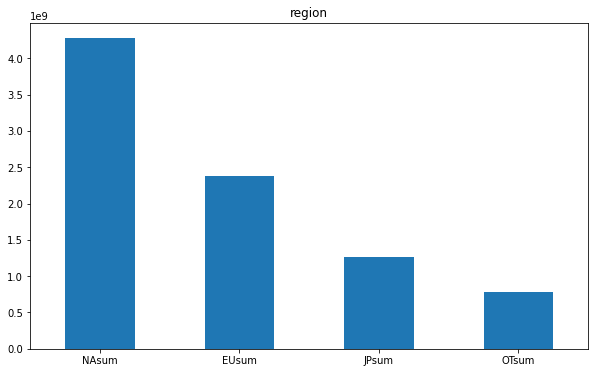

In [17]:
region_sales_total['region'].plot.bar(x='region',rot=0, subplots=True,figsize=(10,6));

In [18]:
# 각 지역별 판매량 top100 내림차순 정렬에 따른 장르 추출

df1_Genre_NA = df1.sort_values(by=['NA_Sales'], axis=0, ascending = False).head(100)
df1_Genre_EU = df1.sort_values(by=['EU_Sales'], axis=0, ascending = False).head(100)
df1_Genre_JP = df1.sort_values(by=['JP_Sales'], axis=0, ascending = False).head(100)
df1_Genre_OT = df1.sort_values(by=['Other_Sales'], axis=0, ascending = False).head(100)

# df1_Genre_NA[['Genre','NA_Sales']].sort_values(by=['Genre'],axis=0, ascending = False)
# top100_Genre = pd.concat([df1_Genre_NA, df1_Genre_EU, df1_Genre_JP, df1_Genre_OT],axis=1)
# top100_Genre

groupby_Genre_NA = df1_Genre_NA.groupby('Genre')
groupby_Genre_EU = df1_Genre_EU.groupby('Genre')
groupby_Genre_JP = df1_Genre_JP.groupby('Genre')
groupby_Genre_OT = df1_Genre_OT.groupby('Genre')

Genre
Action           4.0
Adventure       11.0
Fighting         9.0
Misc             5.0
Platform         2.0
Puzzle           8.0
Racing           7.0
Role-Playing     6.0
Shooter          1.0
Simulation      10.0
Sports           3.0
Name: NA_Sales, dtype: float64

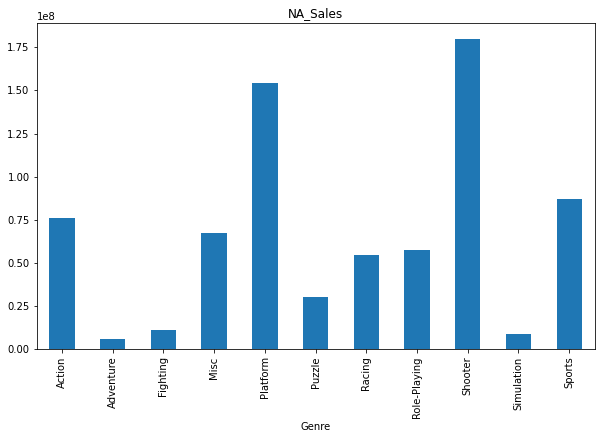

In [71]:
# 북미 지역의 판매량 순으로 정렬해서 상위 100개의 data를 불러온 값 입니다.
# 장르별 판매량 상위5등 순서는
# Shooter(1억7996만장) -> Platform(1억5445만장) -> Sports(8천735만장) -> Action(7천625만장) -> Misc(6천744만장)

Genre100_NA=groupby_Genre_NA['NA_Sales'].sum()
Genre100_NA.plot.bar(subplots=True,figsize=(10,6));
Genre100_NA.rank(ascending=False)


In [73]:
# Shooter(1억7996만장) -> Platform(1억5445만장) -> Sports(8천735만장) -> Action(7천625만장) -> Misc(6천744만장)

Genre100_NA

Genre
Action           76250000.0
Adventure         6160000.0
Fighting         11160000.0
Misc             67440000.0
Platform        154450000.0
Puzzle           30480000.0
Racing           54820000.0
Role-Playing     57810000.0
Shooter         179960000.0
Simulation        9070000.0
Sports           87350000.0
Name: NA_Sales, dtype: float64

Genre
Action           3.0
Adventure       10.0
Fighting        11.0
Misc             7.0
Platform         6.0
Puzzle           9.0
Racing           5.0
Role-Playing     4.0
Shooter          2.0
Simulation       8.0
Sports           1.0
Name: EU_Sales, dtype: float64

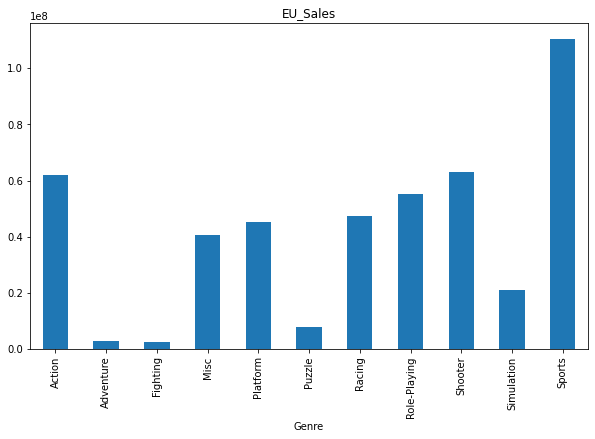

In [21]:
# 유럽 지역의 판매량순으로 정렬해서 상위 100개의 data를 불러온 값 입니다.
# 장르별 판매량 상위5등 순서는
# Sports(1억1053만장) -> Shooter(6천304만장) -> Action(6천205만장) -> Role-Playing(5523만장) -> Racing(4747만장)


Genre100_EU=groupby_Genre_EU['EU_Sales'].sum()
Genre100_EU.plot.bar(subplots=True,figsize=(10,6));
Genre100_EU.rank(ascending=False)

In [75]:
# Sports(1억1053만장) -> Shooter(6천304만장) -> Action(6천205만장) -> Role-Playing(5523만장) -> Racing(4747만장)

Genre100_EU

Genre
Action           62050000.0
Adventure         2790000.0
Fighting          2610000.0
Misc             40590000.0
Platform         45190000.0
Puzzle            7840000.0
Racing           47470000.0
Role-Playing     55230000.0
Shooter          63040000.0
Simulation       20940000.0
Sports          110530000.0
Name: EU_Sales, dtype: float64

Genre
Action           8.0
Adventure       10.0
Fighting         9.0
Misc             5.0
Platform         2.0
Puzzle           6.0
Racing           4.0
Role-Playing     1.0
Simulation       7.0
Sports           3.0
Name: JP_Sales, dtype: float64

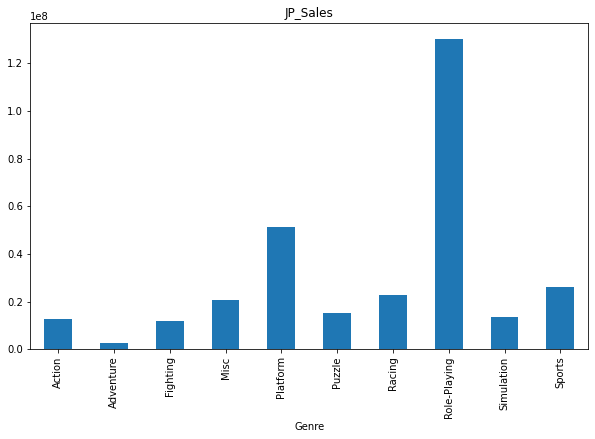

In [76]:
# 일본 지역의 판매량순으로 정렬해서 상위 100개의 data를 불러온 값 입니다.
# 장르별 판매량 상위5등 순서는
# Role-Playing(1억3038만장) -> Platform(5126만장) -> Sports(2611만장) -> Racing(2273만장) -> Misc(2083만장)


Genre100_JP=groupby_Genre_JP['JP_Sales'].sum()
Genre100_JP.plot.bar(subplots=True,figsize=(10,6));
Genre100_JP.rank(ascending=False)

In [79]:
# Role-Playing(1억3038만장) -> Platform(5126만장) -> Sports(2611만장) -> Racing(2273만장) -> Misc(2083만장)

Genre100_JP

Genre
Action           12730000.0
Adventure         2690000.0
Fighting         12020000.0
Misc             20830000.0
Platform         51260000.0
Puzzle           15040000.0
Racing           22730000.0
Role-Playing    130380000.0
Simulation       13510000.0
Sports           26110000.0
Name: JP_Sales, dtype: float64

Genre
Action           1.0
Fighting         9.0
Misc             5.0
Platform         7.0
Puzzle          10.0
Racing           4.0
Role-Playing     6.0
Shooter          3.0
Simulation       8.0
Sports           2.0
Name: Other_Sales, dtype: float64

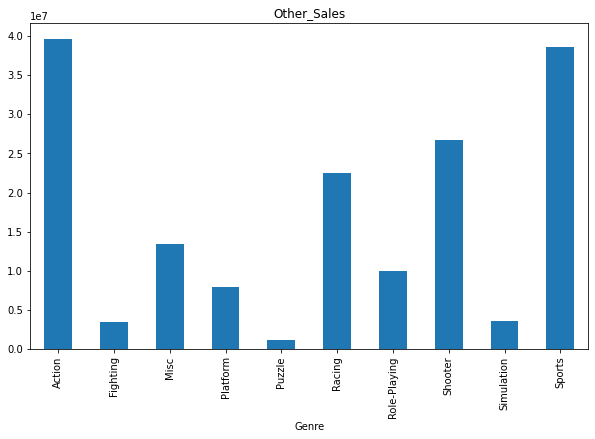

In [82]:
# 위의 3개 지역을 제외한 나머지 지역의 판매량순으로 정렬해서 상위 100개의 data를 불러온 값 입니다.
# 장르별 판매량 상위5등 순서는
# Action(3965만장) -> Sports(3859만장) -> Shooter(2673만장) -> Racing(2252만장) -> Misc(1350만장)

Genre100_OT=groupby_Genre_OT['Other_Sales'].sum()
Genre100_OT.plot.bar(subplots=True,figsize=(10,6));
Genre100_OT.rank(ascending=False)

In [83]:
# Action(3965만장) -> Sports(3859만장) -> Shooter(2673만장) -> Racing(2252만장) -> Misc(1350만장)

Genre100_OT

Genre
Action          39650000.0
Fighting         3520000.0
Misc            13500000.0
Platform         7910000.0
Puzzle           1180000.0
Racing          22520000.0
Role-Playing    10010000.0
Shooter         26730000.0
Simulation       3630000.0
Sports          38590000.0
Name: Other_Sales, dtype: float64

In [94]:
# 한 bar plot으로 합쳐 점유율을 알아보도록 하겠습니다.

result = pd.concat([Genre100_NA,Genre100_EU,Genre100_JP,Genre100_OT],axis=1).fillna(0)
result1 = pd.concat([Genre100_NA,Genre100_JP],axis=1)
result2 = pd.concat([Genre100_EU,Genre100_OT],axis=1)
#arr0 = Genre100_NA.to_numpy()
#arr1 = Genre100_EU.to_numpy()
#arr2 = Genre100_JP.to_numpy()
#arr3 = Genre100_OT.to_numpy()
#arr0,arr1,arr2,arr3

In [87]:
result

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Action,76250000.0,62050000.0,12730000.0,39650000.0
Adventure,6160000.0,2790000.0,2690000.0,0.0
Fighting,11160000.0,2610000.0,12020000.0,3520000.0
Misc,67440000.0,40590000.0,20830000.0,13500000.0
Platform,154450000.0,45190000.0,51260000.0,7910000.0
Puzzle,30480000.0,7840000.0,15040000.0,1180000.0
Racing,54820000.0,47470000.0,22730000.0,22520000.0
Role-Playing,57810000.0,55230000.0,130380000.0,10010000.0
Shooter,179960000.0,63040000.0,0.0,26730000.0
Simulation,9070000.0,20940000.0,13510000.0,3630000.0


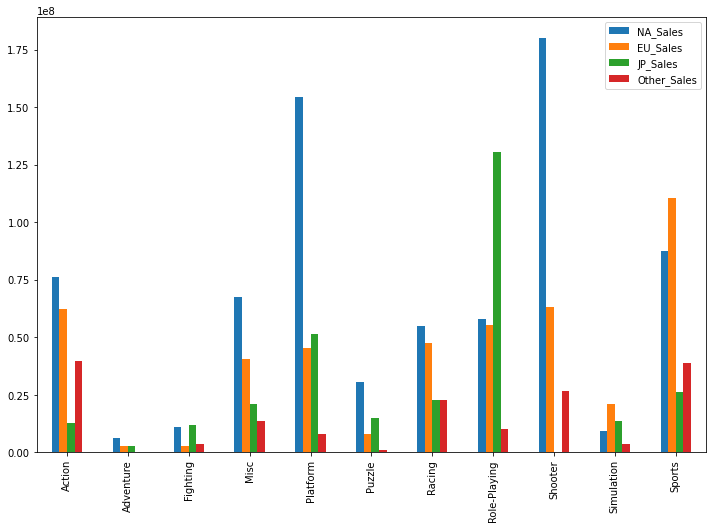

In [95]:
# NA : Shooter(1억7996만장) -> Platform(1억5445만장) -> Sports(8천735만장) -> Action(7천625만장) -> Misc(6천744만장)
# EU : Sports(1억1053만장) -> Shooter(6천304만장) -> Action(6천205만장) -> Role-Playing(5523만장) -> Racing(4747만장)

# JP : Role-Playing(1억3038만장) -> Platform(5126만장) -> Sports(2611만장) -> Racing(2273만장) -> Misc(2083만장)
# OT : Action(3965만장) -> Sports(3859만장) -> Shooter(2673만장) -> Racing(2252만장) -> Misc(1350만장)

result.plot.bar(figsize=(12,8));

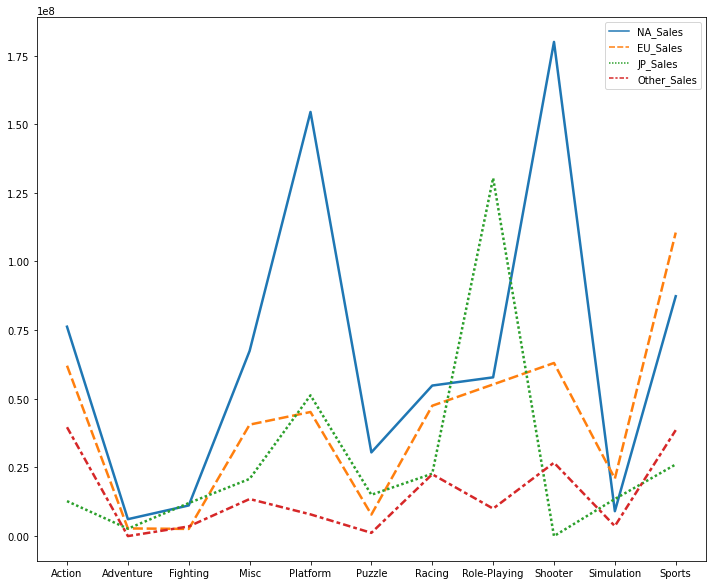

In [96]:
plt.figure(figsize=(12, 10)) 
sns.lineplot(data = result,palette="tab10", linewidth=2.5)

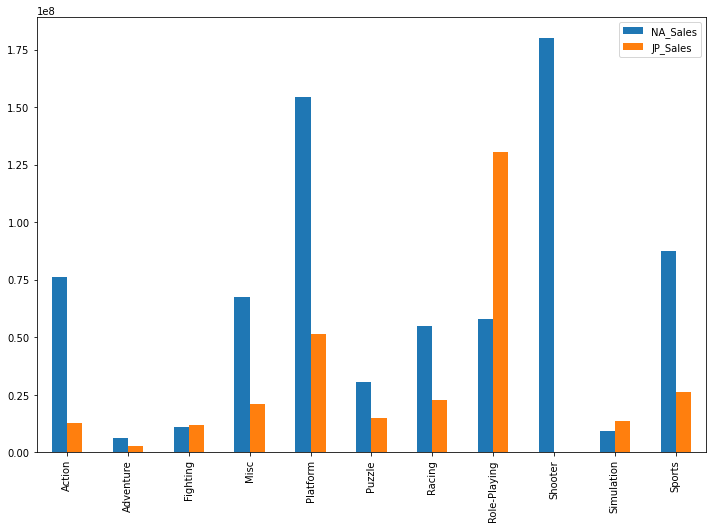

In [97]:
# 북미, 일본의 상관관계
# 북미와 일본은 판매량 순으로 보았을 때 판매량 top5중 3개의 판매율이 비슷하게 높게 확인 되므로 비슷한 경향이 있다.

result1.plot.bar(figsize=(12,8));

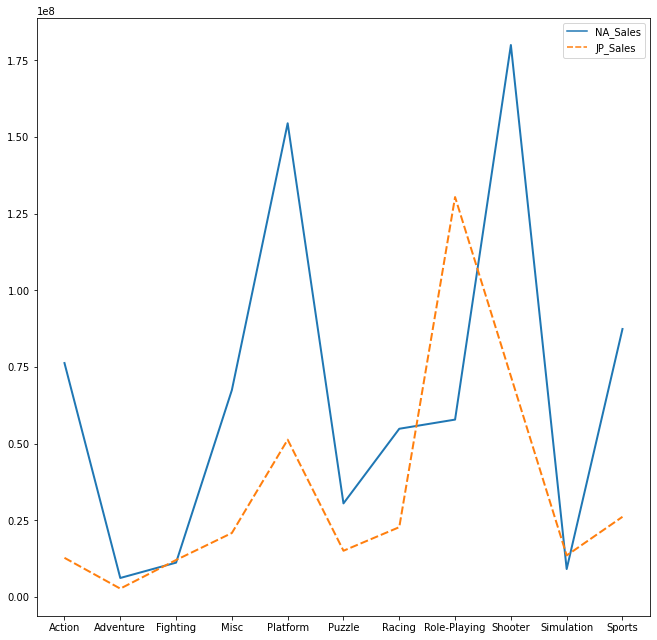

In [98]:
plt.figure(figsize=(11, 11)) 
sns.lineplot(data = result1,palette="tab10", linewidth=2)

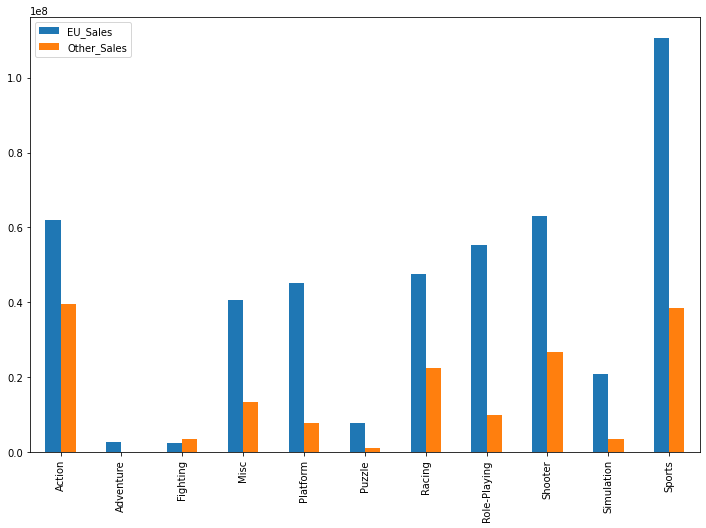

In [99]:
# 유럽, other 지역의 상관관계(%)
# 유럽과 이외지역은 판매량 순으로 보았을 때 판매량 top5중 3개의 판매율이 비슷하게 높게 확인 되므로 비슷한 경향이 있다.

result2.plot.bar(figsize=(12,8));

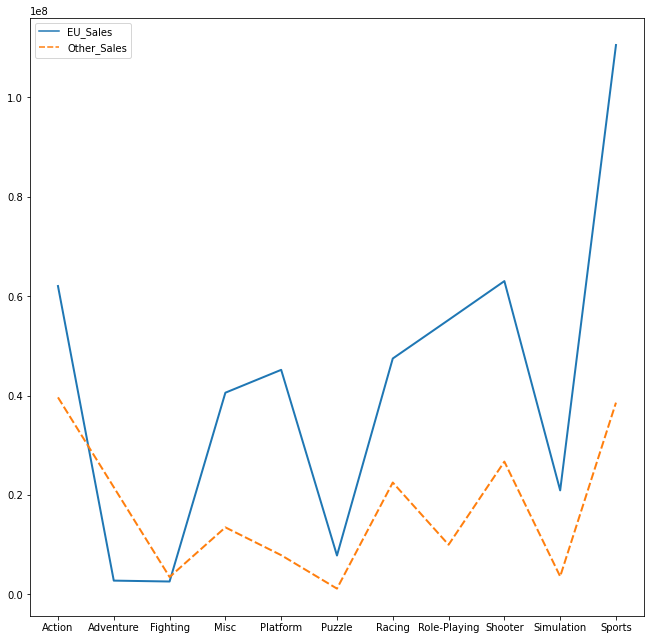

In [100]:
plt.figure(figsize=(11, 11)) 
sns.lineplot(data = result2,palette="tab10", linewidth=2)

# 연도별 게임의 트렌드를 알아보기 위해 다음과 같은 과정을 거쳤습니다.


1. DATA를 'Year'와 'Genre'로 정렬함. 

2. 연도와 장르의 상관관계를 확인

In [16]:
df1['Total_Sales']=df1['NA_Sales']+df1['EU_Sales']+df1['JP_Sales']+df1['Other_Sales']

In [17]:
df2=df1.sort_values(by=['Year'], axis=0, ascending = True).reset_index(drop=True)
df2['Total_Sales'] = df2['NA_Sales']+df2['EU_Sales']+df2['JP_Sales']+df2['Other_Sales']
df2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Boxing,A2600,1980.0,Fighting,Activision,720000.0,40000.0,0.0,10000.0,770000.0
1,Asteroids,A2600,1980.0,Shooter,Atari,4000000.0,260000.0,0.0,50000.0,4310000.0
2,Missile Command,A2600,1980.0,Shooter,Atari,2560000.0,170000.0,0.0,30000.0,2760000.0
3,Bridge,A2600,1980.0,Misc,Activision,250000.0,20000.0,0.0,0.0,270000.0
4,Freeway,A2600,1980.0,Action,Activision,320000.0,20000.0,0.0,0.0,340000.0
...,...,...,...,...,...,...,...,...,...,...
16236,Jikkyou Powerful Pro Baseball 2016,PS3,2016.0,Sports,Konami Digital Entertainment,0.0,0.0,110000.0,0.0,110000.0
16237,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.0,0.0,30000.0,0.0,30000.0
16238,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.0,0.0,10000.0,0.0,10000.0
16239,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.0,0.0,10000.0,0.0,10000.0


In [ ]:
#year1980 = df2.query("Year == 1980")
#year1980['NA_Sales'].idxmax(axis=0)
# display(year1980)
#year1980.iloc[1:2]


#year1980max=year1980max.loc[['1'],]



#groupby_Genre_NA = df1_Genre_NA.groupby('Genre')

In [18]:
id0=pd.DataFrame(df2.groupby(['Year', 'Genre'])['Publisher'].count()).reset_index()
id0.columns = ['Year','Genre','Count_value']
id0

#year_genre
#df.loc[df.groupby(['target'])['sepal length (cm)'].idxmax()]

,Year,Genre,Count_value
0,1980.0,Action,1
1,1980.0,Fighting,1
2,1980.0,Misc,4
3,1980.0,Shooter,2
4,1981.0,Action,25
...,...,...,...
383,2016.0,Sports,38
384,2016.0,Strategy,10
385,2017.0,Action,1
386,2017.0,Role-Playing,2


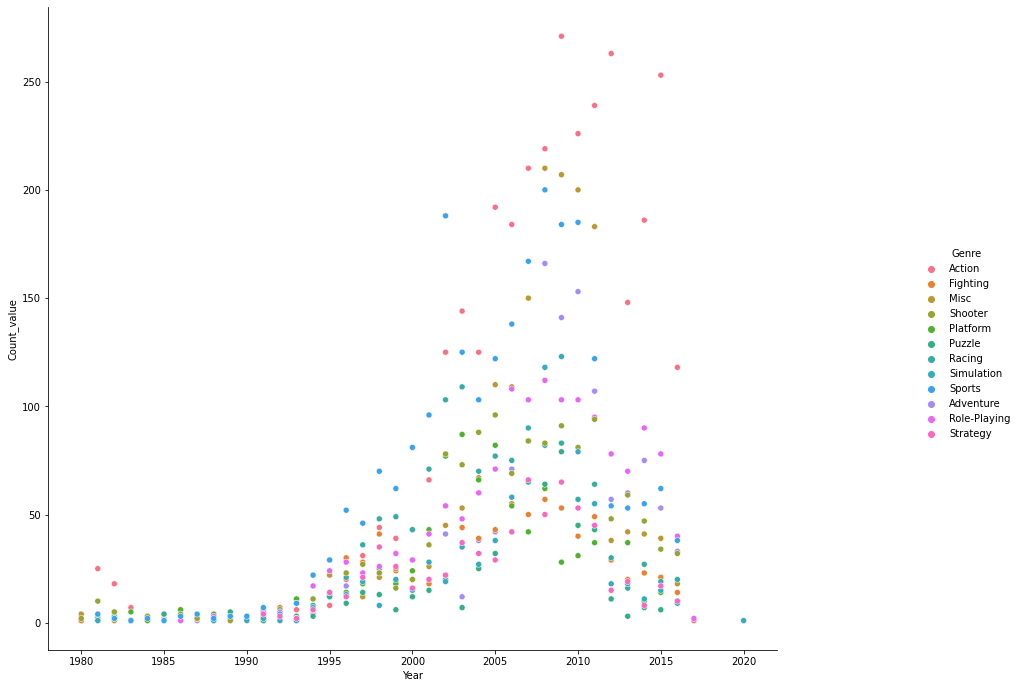

In [19]:
import seaborn as sns

fig1=sns.relplot(data = id0, x='Year', y='Count_value', hue = 'Genre')
fig1.fig.set_size_inches(15,10)

# 연도가 최근으로 오면서 장르수가 늘어나는 것을 볼 수 있고 인기있는 장르에대해서는 확연히 늘어나는 것을 확인 할 수 있습니다.

#시각화!

In [45]:
df_Genre_sum1 = df1[['Year', 'Genre', 'Total_Sales']]
df_Genre_sum_count = df_Genre_sum1.groupby(['Year', 'Genre']).sum().reset_index()
df_Genre_sum_count['Count'] = df1[['Year', 'Genre', 'Name']].groupby(['Year','Genre']).count().reset_index()['Name']
df_Genre_sum_count

,Year,Genre,Total_Sales,Count
0,1980.0,Action,340000.0,1
1,1980.0,Fighting,770000.0,1
2,1980.0,Misc,2700000.0,4
3,1980.0,Shooter,7070000.0,2
4,1981.0,Action,14680000.0,25
...,...,...,...,...
383,2016.0,Sports,14630000.0,38
384,2016.0,Strategy,520000.0,10
385,2017.0,Action,10000.0,1
386,2017.0,Role-Playing,40000.0,2


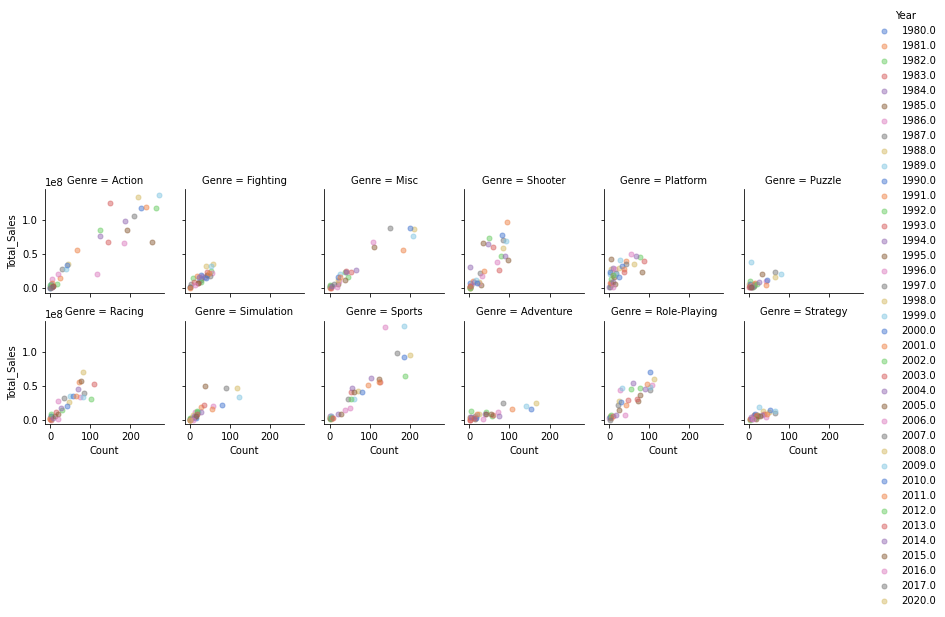

In [46]:
sns.lmplot(x="Count", y="Total_Sales", col="Genre", hue="Year", data=df_Genre_sum_count,
           col_wrap=6, ci=20, palette="muted", height=2,
           scatter_kws={"s": 25, "alpha": 0.5})

# 장르 수 와 판매량은 양의 상관관계가 있는 것을 볼 수 있습니다.
# 특히 action, shooter, Sports 에서 두드러지게 나타납니다


In [47]:
df11_Genre_sum_count=df_Genre_sum_count.drop(columns='Year')

In [48]:
df11_Genre_sum_count.corr()

,Total_Sales,Count
Total_Sales,1.000000,0.860542
Count,0.860542,1.000000


In [49]:
df1['Total_Sales']=df1['NA_Sales']+df1['EU_Sales']+df1['JP_Sales']+df1['Other_Sales']
df1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0,40000.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0,180000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0,20000.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0,40000.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0,250000.0
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0,200000.0
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000.0,0.0,0.0,0.0,10000.0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0,790000.0
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0,380000.0


In [50]:
df1_Platform = df1[['Year','Publisher','Platform','Genre','Total_Sales']]
df1_Platform = df1_Platform.groupby(['Year','Platform','Genre','Total_Sales']).sum().reset_index()
df1_Platform

,Year,Platform,Genre,Total_Sales,Publisher
0,1980.0,A2600,Action,340000.0,Activision
1,1980.0,A2600,Fighting,770000.0,Activision
2,1980.0,A2600,Misc,230000.0,Atari
3,1980.0,A2600,Misc,270000.0,Activision
4,1980.0,A2600,Misc,1050000.0,Atari
...,...,...,...,...,...
13091,2016.0,XOne,Strategy,20000.0,Take-Two Interactive
13092,2017.0,PS4,Role-Playing,30000.0,Sega
13093,2017.0,PSV,Action,10000.0,Idea Factory
13094,2017.0,PSV,Role-Playing,10000.0,Sega


In [51]:
df1_Platform

,Year,Platform,Genre,Total_Sales,Publisher
0,1980.0,A2600,Action,340000.0,Activision
1,1980.0,A2600,Fighting,770000.0,Activision
2,1980.0,A2600,Misc,230000.0,Atari
3,1980.0,A2600,Misc,270000.0,Activision
4,1980.0,A2600,Misc,1050000.0,Atari
...,...,...,...,...,...
13091,2016.0,XOne,Strategy,20000.0,Take-Two Interactive
13092,2017.0,PS4,Role-Playing,30000.0,Sega
13093,2017.0,PSV,Action,10000.0,Idea Factory
13094,2017.0,PSV,Role-Playing,10000.0,Sega


In [52]:
df1_total=df1_Platform.sort_values(by='Total_Sales', ascending=False).head(100)
df1_total

,Year,Platform,Genre,Total_Sales,Publisher
5904,2006.0,Wii,Sports,82740000.0,Nintendo
124,1985.0,NES,Platform,40240000.0,Nintendo
7777,2008.0,Wii,Racing,35830000.0,Nintendo
8911,2009.0,Wii,Sports,33000000.0,Nintendo
679,1996.0,GB,Role-Playing,31380000.0,Nintendo
...,...,...,...,...,...
5870,2006.0,Wii,Action,7320000.0,Nintendo
12821,2015.0,XOne,Shooter,7290000.0,Activision
8787,2009.0,Wii,Misc,7270000.0,Ubisoft
171,1988.0,NES,Platform,7270000.0,Nintendo


In [53]:
df1_total.sort_values(by='Year', ascending=False).head(100)

,Year,Platform,Genre,Total_Sales,Publisher
12630,2015.0,PS4,Shooter,14240000.0,Activision
12821,2015.0,XOne,Shooter,7290000.0,Activision
12645,2015.0,PS4,Sports,8490000.0,Electronic Arts
12629,2015.0,PS4,Shooter,7670000.0,Electronic Arts
11928,2014.0,3DS,Role-Playing,11330000.0,Nintendo
...,...,...,...,...,...
172,1988.0,NES,Platform,17280000.0,Nintendo
171,1988.0,NES,Platform,7270000.0,Nintendo
124,1985.0,NES,Platform,40240000.0,Nintendo
114,1984.0,NES,Shooter,28310000.0,Nintendo


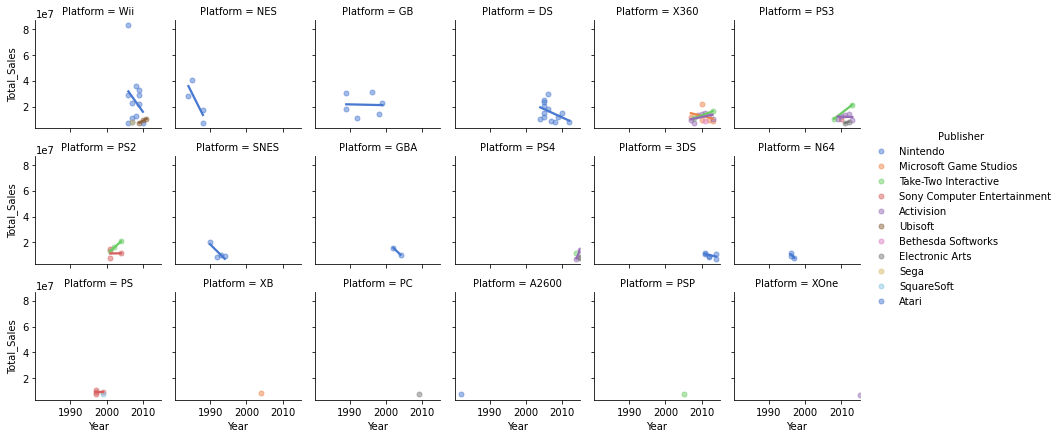

In [54]:
sns.lmplot(x="Year", y="Total_Sales", col="Platform", hue="Publisher", data=df1_total,
           col_wrap=6, ci=None, palette="muted", height=2,
           scatter_kws={"s": 25, "alpha": 0.5})


# 플랫폼에 따른 연도별 판매량수를 확인 해 보았습니다.
# X360, PS3에서 양의 상관관계가 나타나며 해당 플랫폼의 판매량도 높은 것을 확인 할 수 있습니다.

In [ ]:
# 위 내용을 종합해 보았을 때 

# 선공개 : 북미
# Publisher : Activision, Electronic Arts, Nintendo
# Platform : X360, PS3
# Genre : Shooter, Sports, Action의 게임
# 을 출시 해야합니다.

